In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#crate frame(column titles) for web scraping data
d = {'name': [], 'position': []}
r = requests.get('https://www.mlb.com/stats/2023')
soup = BeautifulSoup(r.content, 'html.parser')
table = soup.find(class_="table-scroller-GsCM0EhI scroller")
columns = [c.get_text() for c in table.find_all('abbr')][2::2]
for i in range (len(columns)):
    d[columns[i]] = []

In [ ]:
#web scrape data
for i in range (1, 32):
  r = requests.get('https://www.mlb.com/stats/hits/2023/?page=' + str(i))
  print('https://www.mlb.com/stats/2023/?page=' + str(i))

  soup = BeautifulSoup(r.content, 'html.parser')
  table = soup.find(class_="table-scroller-GsCM0EhI scroller")

  columns = [c.get_text() for c in table.find_all('abbr')][2::2]
  name = [r.get_text() for r in table.find_all('span', class_="short-IiSPVSQp")]
  position = [r.get_text() for r in table.find_all('div', class_="position-SAxuJGcx")]
  stat = [r.get_text() for r in table.find_all('td')]

  d['name'] += name
  d['position'] += position
  for i in range (len(columns)):
    if i > 12:
      d[columns[i]] += [float(stat[j]) for j in range(i, len(stat),len(columns))]
    elif i > 0:
      d[columns[i]] += [int(stat[j]) for j in range(i, len(stat),len(columns))]
    else:
      d[columns[i]] += [stat[j] for j in range(i, len(stat),len(columns))]

https://www.mlb.com/stats/2023/?page=1
https://www.mlb.com/stats/2023/?page=2
https://www.mlb.com/stats/2023/?page=3
https://www.mlb.com/stats/2023/?page=4
https://www.mlb.com/stats/2023/?page=5
https://www.mlb.com/stats/2023/?page=6
https://www.mlb.com/stats/2023/?page=7
https://www.mlb.com/stats/2023/?page=8
https://www.mlb.com/stats/2023/?page=9
https://www.mlb.com/stats/2023/?page=10
https://www.mlb.com/stats/2023/?page=11
https://www.mlb.com/stats/2023/?page=12
https://www.mlb.com/stats/2023/?page=13
https://www.mlb.com/stats/2023/?page=14
https://www.mlb.com/stats/2023/?page=15
https://www.mlb.com/stats/2023/?page=16
https://www.mlb.com/stats/2023/?page=17
https://www.mlb.com/stats/2023/?page=18
https://www.mlb.com/stats/2023/?page=19
https://www.mlb.com/stats/2023/?page=20
https://www.mlb.com/stats/2023/?page=21
https://www.mlb.com/stats/2023/?page=22
https://www.mlb.com/stats/2023/?page=23
https://www.mlb.com/stats/2023/?page=24
https://www.mlb.com/stats/2023/?page=25
https://w

In [ ]:
df = pd.DataFrame(d)
df

,name,position,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,R Acuña Jr.,RF,ATL,159,643,149,217,35,4,41,106,80,84,73,14,0.337,0.416,0.596,1.012
1,F Freeman,1B,LAD,161,637,131,211,59,2,29,102,72,121,23,1,0.331,0.410,0.567,0.977
2,L Arraez,2B,MIA,147,574,71,203,30,3,10,69,35,34,3,2,0.354,0.393,0.469,0.862
3,M Semien,2B,TEX,162,670,122,185,40,4,29,100,72,110,14,3,0.276,0.348,0.478,0.826
4,J Rodríguez,CF,SEA,155,654,102,180,37,2,32,103,47,175,37,10,0.275,0.333,0.485,0.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,H Wesneski,P,CHC,34,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000
765,G Whitlock,P,BOS,22,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000
766,N Wittgren,P,KC,27,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000
767,R Yarbrough,P,LAD,11,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000


In [ ]:
df.to_csv("2023 mlb batting data.csv")

In [ ]:
df['ISO'] = df['SLG'] - df['AVG']
df['K%'] = df['SO'] / df['AB']
df['BB%'] = df['BB'] / df['AB']

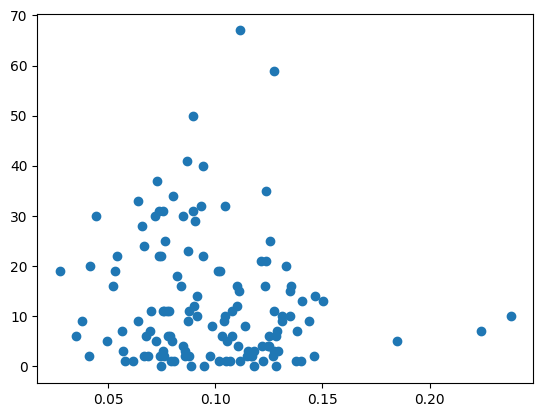

In [ ]:
plt.scatter(df['BB%'], df['SB'])

<Axes: ylabel='SB'>

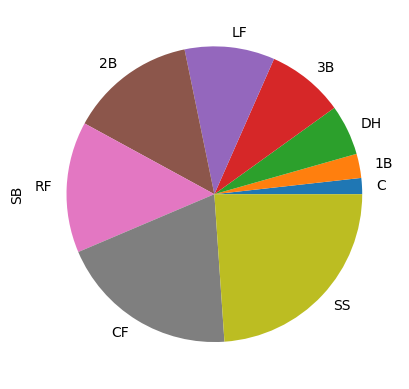

In [ ]:
df.groupby('position')['SB'].mean().sort_values().plot(kind='pie')

<Axes: xlabel='position'>

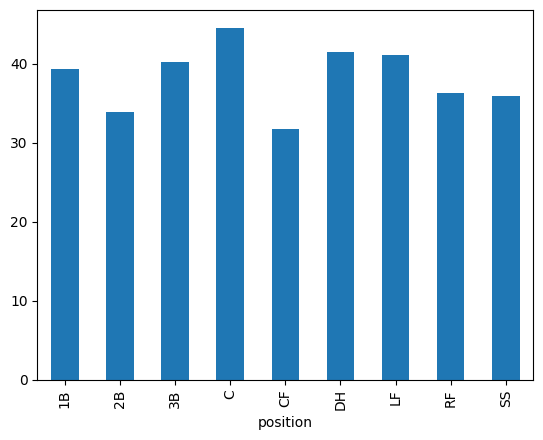

In [ ]:
df.groupby('position')['RBI'].mean().plot(kind='bar')

In [2]:
import tensorflow as tf
import numpy as np

In [ ]:
df1 = pd.read_csv('2024 mlb batting data.csv')
df2 = pd.read_csv('2023 mlb batting data.csv')

In [ ]:
#prepare data set for ml
x_train = np.column_stack([df1.iloc[:,i].to_numpy() for i in range(4, 20)])
y_train = pd.get_dummies(df1['position'])
y_train.drop('X', axis=1, inplace=True)
y_train.drop('P', axis=1, inplace=True)

x_test = np.column_stack([df2.iloc[:,i].to_numpy() for i in range(4, 20)])
y_test = pd.get_dummies(df2['position'])

In [ ]:
#normalize data
norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(x_train)

In [ ]:
#model for position prediction(classfication for 9 classes)
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(32, input_shape=(16,), activation='relu'),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0873 - loss: 2.3075 - val_accuracy: 0.0091 - val_loss: 0.2981
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1664 - loss: 2.1458 - val_accuracy: 0.0091 - val_loss: 0.3033
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1796 - loss: 2.1104 - val_accuracy: 0.0182 - val_loss: 0.3033
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1975 - loss: 2.0437 - val_accuracy: 0.0182 - val_loss: 0.3015
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2445 - loss: 2.0068 - val_accuracy: 0.0182 - val_loss: 0.2962
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2148 - loss: 2.0165 - val_accuracy: 0.0182 - val_loss: 0.2897
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2764 - loss: 1.9538 - val_accuracy: 0.0273 - val_loss: 0.2816
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2211 - loss: 1.9518 - val_accuracy: 0.0182 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


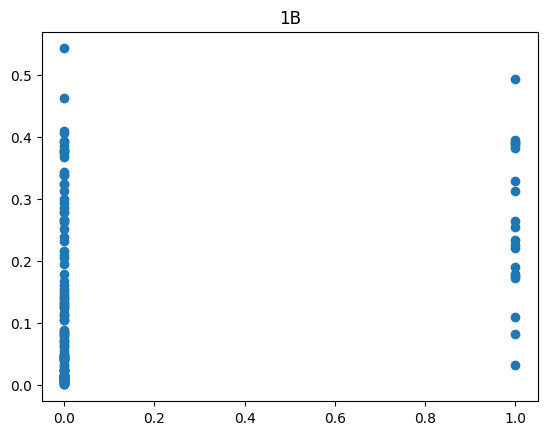

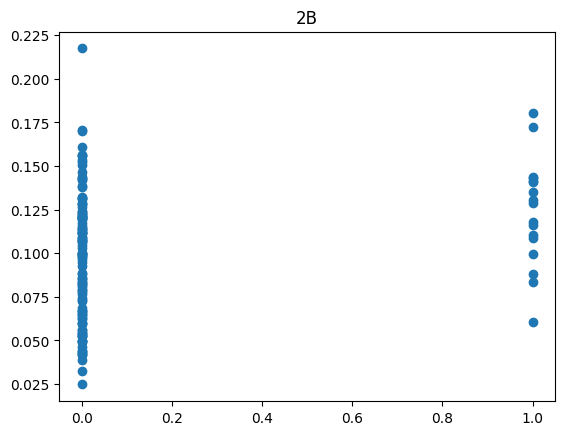

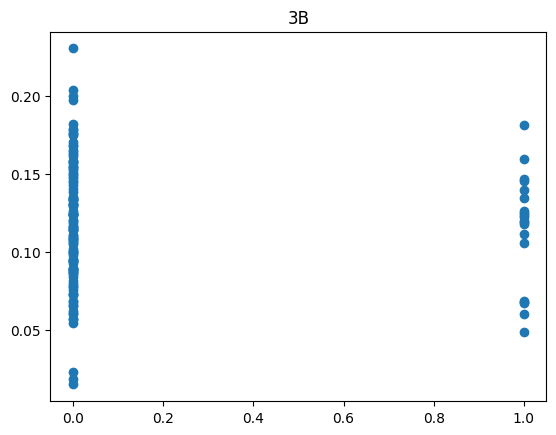

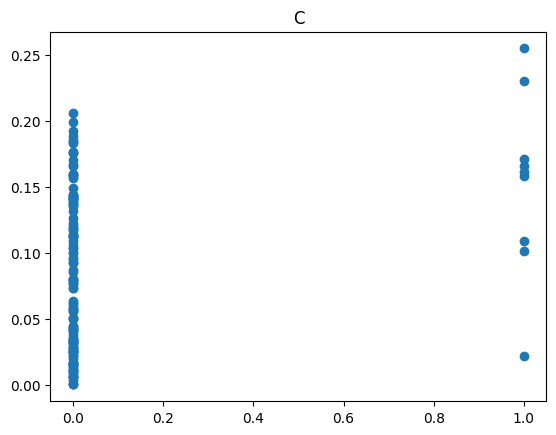

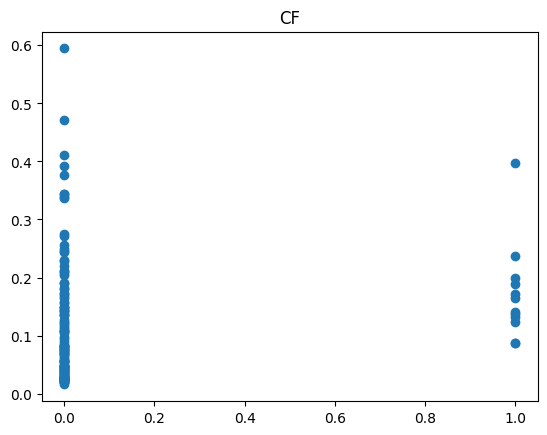

In [ ]:
#evaluate prediction
result = model.predict(x_test)
for i in range(5):
  plt.scatter(y_test.iloc[:,i], result[:,i])
  plt.title(y_test.columns[i])
  plt.show()